# Task 1: Image classification + OOP

In this task, we need to use a publicly available simple MNIST dataset and build 3 classification
models around it. It should be the following models:

1) Random Forest;

2) Feed-Forward Neural Network;

3) Convolutional Neural Network;

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

from mnist_classifier import MnistClassifier

# EDA
Let's understand how do we need to preprocess our data to build an efficient model. For doing this let's dowload the data and do some EDA

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


Let's review class distribution in training dataset

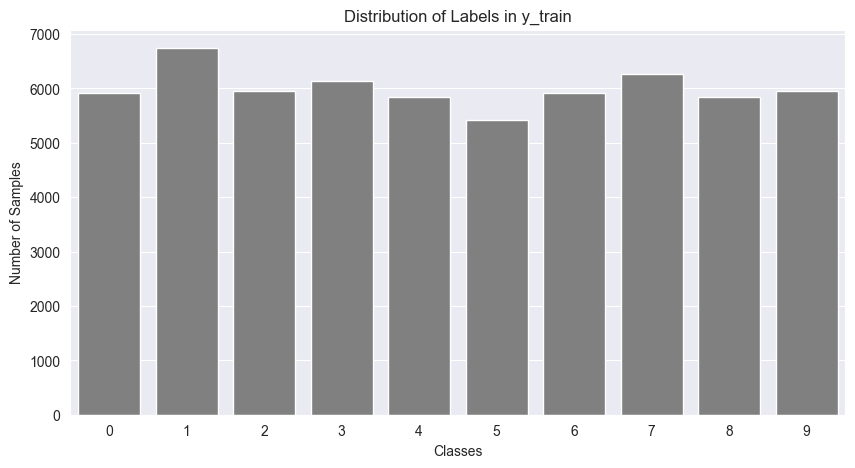

In [3]:
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=unique, y=counts, color="gray")

plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title("Distribution of Labels in y_train")
plt.show()

Class distribution looks balanced. Let's visualize some samples.

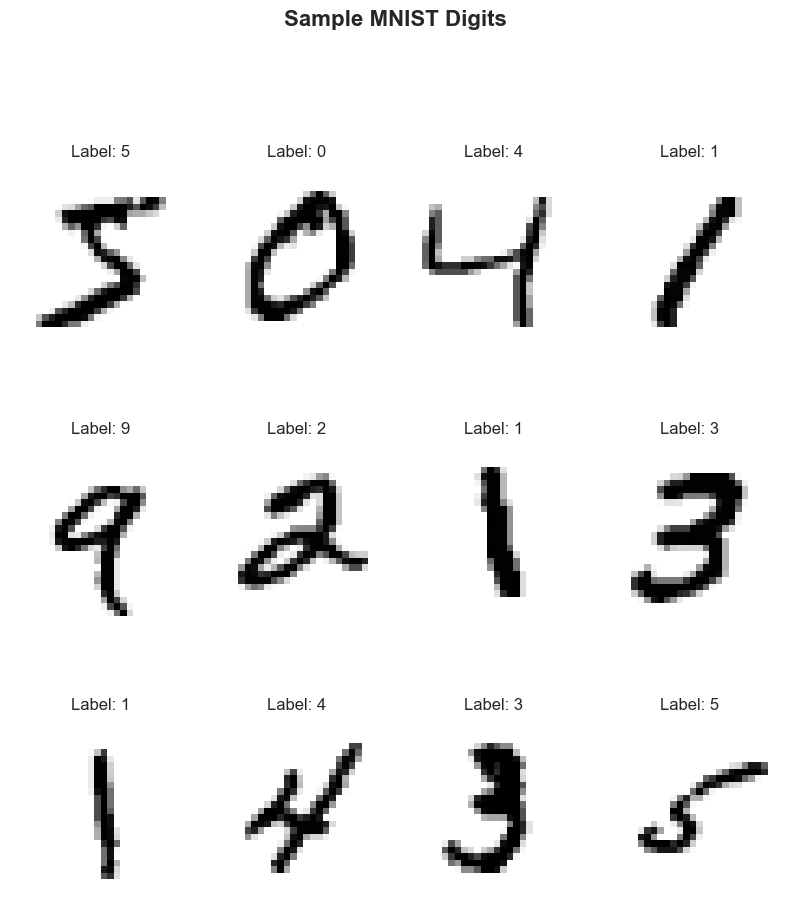

In [4]:
fig, axes = plt.subplots(3, 4, figsize=(8, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='binary')
    ax.set_title(f"Label: {y_train[i]}", fontsize=12)
    ax.axis("off")

fig.suptitle("Sample MNIST Digits", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Now let's think about inputs of each model.
- **Random Forest:** expect **flat vector** with size of height*width (in our case 784). Random forests consist of decision trees that are not affected by the absolute scale of the values. Talking about label, we don't need to change them.

- **Feed-Forward Neural Network:** expect **flat vector** with size of height*width (in our case 784). Neural networks in general are sensitive to the range of input values, so we will need to normalize data for this model. For labels we should use one-hot encoding.

- **Convolutional Neural Network:** except data in 3D (height, width, channels), in our case 2D (28, 28, 1), structure. Need normalization. For labels we should use one-hot encoding.



Taking into account all these features of the models, let's normalise the data for further training.

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Modelling

In [6]:
def visualize_predictions(model, X_test, model_name, y_test=None):
    if model_name == "RF" or model_name == "NN":
        y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
    else:
        y_pred = model.predict(X_test)
        model_name = "CNN"

    fig, axes = plt.subplots(3, 4, figsize=(8, 10))

    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test[i], cmap='binary')
        if y_test is not None:
            ax.set_title(f"True: {y_test[i]} | Predicted: {y_pred[i]}", fontsize=12)
        else:
            ax.set_title(f"Predicted: {y_pred[i]}", fontsize=12)
        ax.axis("off")

    fig.suptitle(f"Sample MNIST Digits with Predictions ({model_name})", fontsize=16, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## Random Forest
Let's start training the model. Model expects 1D array as input, so we will make a reshape before training.

In [7]:
rf_classifier = MnistClassifier(algorithm="rf", config_path="models/models_config.json")
rf_classifier.train(X_train.reshape(X_train.shape[0], -1), y_train)

Let's check classification report

In [8]:
rf_preds = rf_classifier.predict(X_test.reshape(X_test.shape[0], -1))
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



The classification report shows excellent performance with high precision, recall, and F1-score across all classes. The model achieves an overall accuracy of 97%, indicating strong classification ability. It effectively identifies most classes with minimal errors and maintains a good balance between precision and recall.

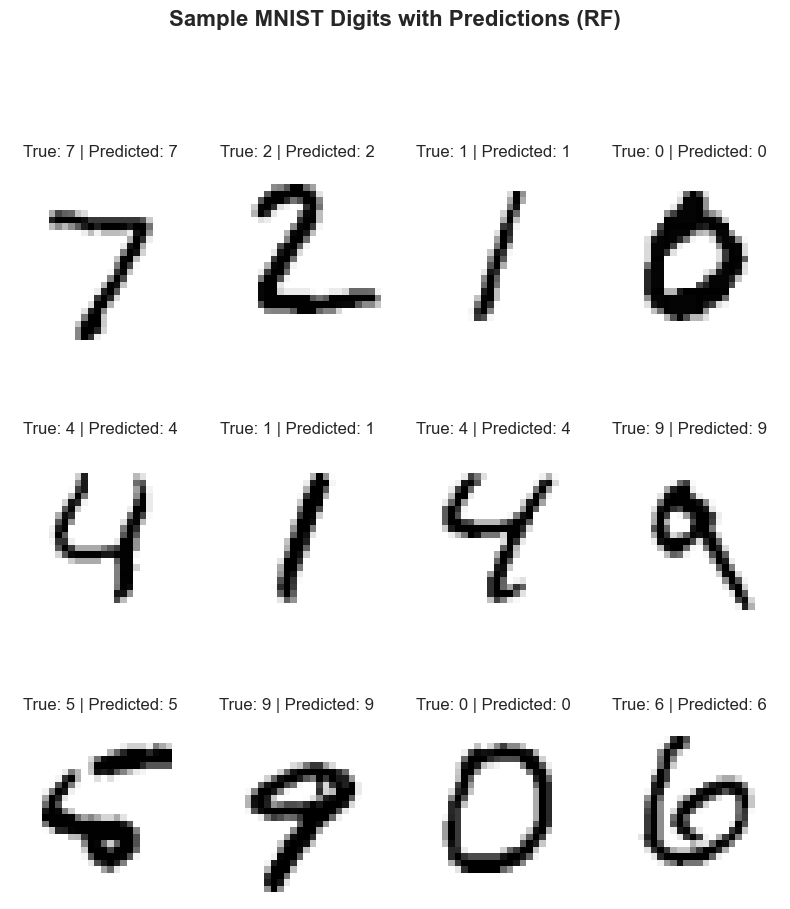

In [9]:
visualize_predictions(rf_classifier, X_test, "RF",  y_test)

## Feed-Forward Neural Network
Let's start training the model. Model expects 1D array as input, so we will make a reshape before training. Also we should encode our train labels with One-hot encoding

In [10]:
y_train_encoded = to_categorical(y_train, num_classes=10)

In [11]:
nn_classifier = MnistClassifier(algorithm="nn", config_path="models/models_config.json")
nn_classifier.train(X_train.reshape(X_train.shape[0], -1), y_train_encoded)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8508 - loss: 0.4814 - val_accuracy: 0.9592 - val_loss: 0.1345
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9592 - loss: 0.1362 - val_accuracy: 0.9711 - val_loss: 0.0940
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9691 - loss: 0.0984 - val_accuracy: 0.9733 - val_loss: 0.0888
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0822 - val_accuracy: 0.9748 - val_loss: 0.0850
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9769 - loss: 0.0691 - val_accuracy: 0.9778 - val_loss: 0.0774
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9800 - loss: 0.0614 - val_accuracy: 0.9766 - val_loss: 0.0790
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9802 - val_loss: 0.0734
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9845 - loss: 0.0495 - 

In [12]:
nn_preds = nn_classifier.predict(X_test.reshape(X_test.shape[0], -1))
print(classification_report(y_test, nn_preds))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.97      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



The classification report indicates excellent performance with an accuracy of 98%. Precision, recall, and F1-scores are consistently high across all classes, reflecting a well-performing model. Compared to Random Forest results, where the accuracy was around 97%, this model shows a slight improvement in performance, with higher precision and recall values across most classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


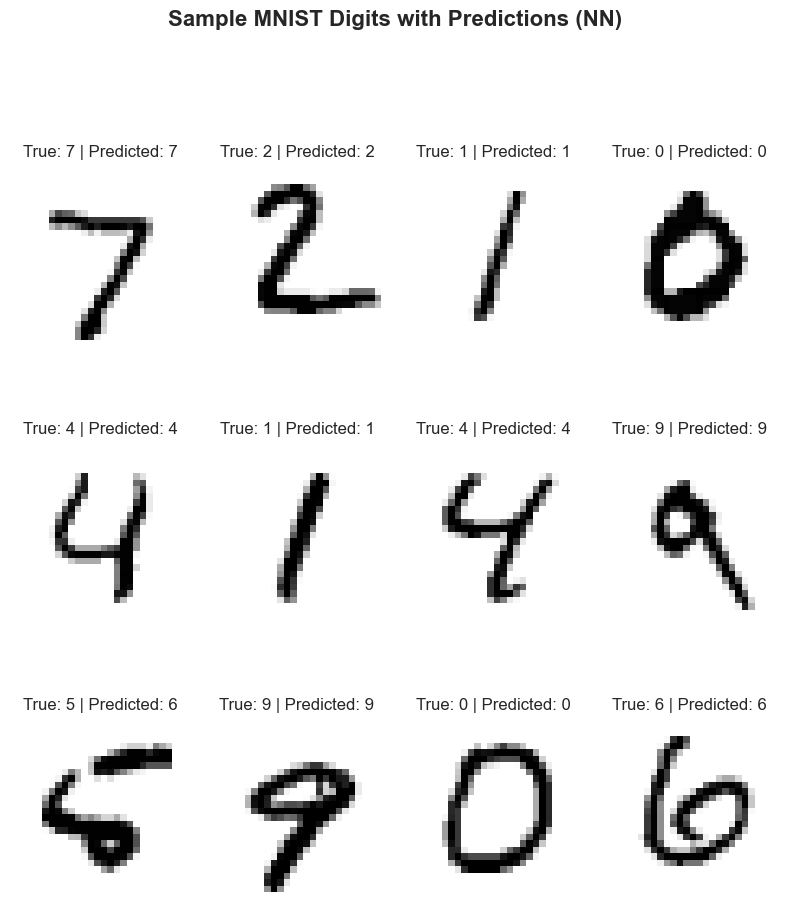

In [13]:
visualize_predictions(nn_classifier, X_test, "NN",  y_test)

We can see that the model missclassified 5, when it was actually 6. But in this case digits are very similar, even human eye cannot precisely determinate what digit is it.

## Convolutional Neural Network
Model expects 2D array as input, so we don't need to reshape our data

In [14]:
cnn_classifier = MnistClassifier(algorithm="cnn", config_path="models/models_config.json")
cnn_classifier.train(X_train, y_train)

C:\Users\pizna\PycharmProjects\Winstars\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8895 - loss: 0.3705 - val_accuracy: 0.9820 - val_loss: 0.0616
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9831 - loss: 0.0560 - val_accuracy: 0.9831 - val_loss: 0.0559
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9884 - loss: 0.0344 - val_accuracy: 0.9841 - val_loss: 0.0537
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9850 - val_loss: 0.0518
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9944 - loss: 0.0184 - val_accuracy: 0.9868 - val_loss: 0.0459
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9957 - loss: 0.0139 - val_accuracy: 0.9844 - val_loss: 0.0543
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9967 - loss: 0.0100 - val_accuracy: 0.9883 - val_loss: 0.0412
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9976 - loss: 0.0078 - 

In [15]:
cnn_preds = cnn_classifier.predict(X_test)
print(classification_report(y_test, cnn_preds))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


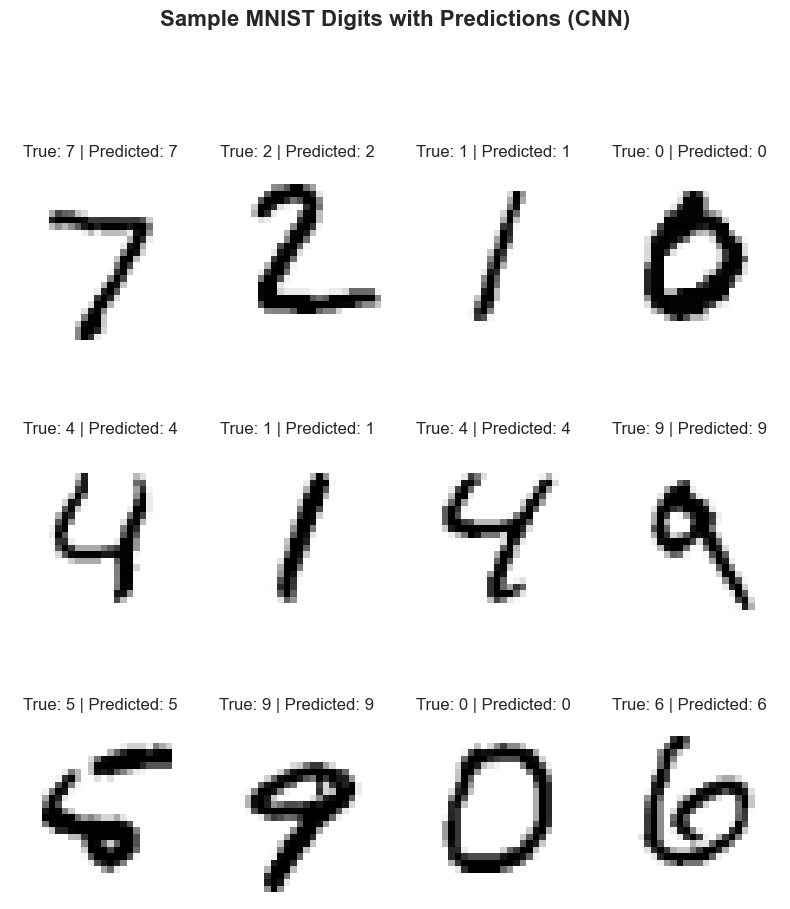

In [16]:
visualize_predictions(cnn_classifier, X_test, "CNN",  y_test)

# Conclusion

In this task 3 different models were build: Random Forest, Feed Forward Neural Network and Convolutional Neural Network. Optimal parameters were selected for each of the models. The Random Forest model with 100 trees was the simplest among the 3 models and showed the lowest accuracy rates of ~97%. Feed Forward neural network showed higher overall accuracy rates with a score of 98%. The convolutional neural network proved to be the best, showing 99% accuracy.